In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nmerahul","key":"5d4246bac9061e478316d59a5ed637de"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!unzip iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 8.75MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


## Aim:- Find core samples of high density and expand clusters from them using DBSCAN Clustering.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
import sys
import random
import numpy as np

class KMeanClustring():
  def __init__(self, k, choose="random"):
    self.k = k
    self.choose = "random"

  def calculate_euclidian(self, x1, x2, y1, y2):
    return np.sqrt( np.power((x2 - x1), 2) + np.power((y2 - y1), 2) )

  def mean(self, arr):
    sum = 0
    for value in arr:
      sum += value
    return sum/len(arr)

  def calculate_sse(self, centroids, centroid_belonging):
    #calculate the distsnce between each data point and it's assigned centroid
    sse = 0
    for index, centroid_index in enumerate(centroid_belonging):
      x1 = self.x[index]; y1 = self.y[index]
      x2 = centroids[centroid_index][0]; y2 = centroids[centroid_index][1]
      distance = self.calculate_euclidian(x1, x2, y1, y2)
      sse += distance ** 2
    return sse

  def calcuate_centroid_radius(self, distance):
    #centroid_radius = largest distance of point from centorid
    self.radius = [0 for _ in range(len(distance))]
    for index, dist in enumerate(distance):
      if self.radius[index] < dist:
        self.radius[index] = dist

  def update_centroids(self, centroids, centroid_belonging):
    temp = [[[], []] for _ in range(len(centroids))]
    for index, centroid_index in enumerate(centroid_belonging):
      temp[centroid_index][0].append(self.x[index])
      temp[centroid_index][1].append(self.y[index])
    #new centroids
    for i in range(len(centroids)):
      centroids[i][0] = self.mean(temp[i][0])
      centroids[i][1] = self.mean(temp[i][1])
    return centroids

  def KMeanAlgo(self, centroids):
    if self.x.shape != self.y.shape: #chack the dimension of data
      sys.exit('Error: dimension mismatch, expected to be same dimesnion of both array, got {} {}' .format(x.shape, y.shape) )
    else:
      distance = []; centroid_belonging = []
      for i in range(len(self.x)):
        x1 = self.x[i]; y1 = self.y[i]
        for j in range(len(centroids)):
          x2 = centroids[j][0]; y2 = centroids[j][1]
          distance.append(self.calculate_euclidian(x1, x2, y1, y2))
        centroid_belonging.append(distance.index(min(distance))) #assign wich data point belongs to which centroid
        self.calcuate_centroid_radius(distance)
        distance.clear() #clear distance claculated for each data point from centroid
    return centroid_belonging

  def fit(self, x, y, epochs, **kwargs):
    self.x = np.array(x)
    self.y = np.array(y)
    self.x = np.squeeze(x)
    self.y = np.squeeze(y)

    if self.choose == "random":
      centroids = [ [random.choice(self.x), random.choice(self.y)] for _ in range(self.k)]
      centroids = np.array(centroids)
    else:
      centroids = kwargs['centroid']

    history = {'centroids': np.array(centroids), 'sse': np.array([])}
    sse = np.array([])
    for epoch in range(epochs):
      print("epoch: {} \nNew Centroids: {}" .format(epoch+1, centroids))
      centroid_belonging = self.KMeanAlgo(centroids)
      centorids = self.update_centroids(centroids, centroid_belonging)
      history['centroids'] = np.append(history['centroids'], centroids, axis=0)
      history['sse'] = np.append(history['sse'], self.calculate_sse(centroids, centroid_belonging))

    history['radius'] = self.radius

    return history

  def __call__():
    print("🫰🏻")

def circle(radius=1, center=(0,0), c='black', show=False):
  series = np.linspace(0, 2*np.pi, 100)
  x = radius * np.sin(series) + center[0]
  y = radius * np.cos(series) + center[1]
  plt.plot(x, y, c=c)
  if show == True:
    plt.show()

In [20]:
df = pd.read_csv('/content/Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
Iris_setosa = df.iloc[:50]
Iris_versicolor = df.iloc[50: 100]
Iris_virginica = df.iloc[100: 150]

In [24]:
Iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
Iris_setosa_SepalLengthCm	 = Iris_setosa['SepalLengthCm']
Iris_versicolor_SepalLengthCm = Iris_versicolor['SepalLengthCm']
Iris_virginica_SepalLengthCm = Iris_virginica['SepalLengthCm']

Iris_setosa_SepalWidthCm = Iris_setosa['SepalWidthCm']
Iris_versicolor_SepalWidthCm = Iris_versicolor['SepalWidthCm']
Iris_virginica_SepalWidthCm = Iris_virginica['SepalWidthCm']

Iris_setosa_PetalLengthCm = Iris_setosa['PetalLengthCm']
Iris_versicolor_PetalLengthCm = Iris_versicolor['PetalLengthCm']
Iris_virginica_PetalLengthCm = Iris_virginica['PetalLengthCm']

Iris_setosa_PetalWidthCm = Iris_setosa['PetalWidthCm']
Iris_versicolor_PetalWidthCm = Iris_versicolor['PetalWidthCm']
Iris_virginica_PetalWidthCm = Iris_virginica['PetalWidthCm']

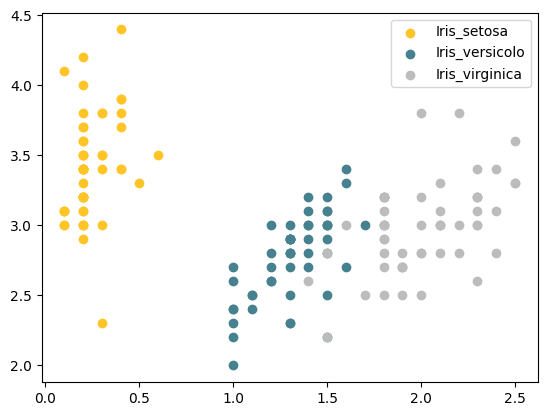

In [113]:
plt.scatter(Iris_setosa_PetalWidthCm, Iris_setosa_SepalWidthCm, c='#ffc425', label='Iris_setosa')
plt.scatter(Iris_versicolor_PetalWidthCm, Iris_versicolor_SepalWidthCm, c='#45818e', label='Iris_versicolo')
plt.scatter(Iris_virginica_PetalWidthCm, Iris_virginica_SepalWidthCm, c='#bcbcbc', label='Iris_virginica')
plt.legend()

plt.show()

In [81]:
model = KMeanClustring(k=3)

epochs = 10
history = model.fit(
    x = df['PetalWidthCm'],
    y = df['SepalWidthCm'],
    epochs=epochs
)

epoch: 1 
New Centroids: [[1.  2.8]
 [1.8 3.4]
 [2.2 2.9]]
epoch: 2 
New Centroids: [[0.70769231 3.07032967]
 [1.76       3.2       ]
 [2.1        2.90294118]]
epoch: 3 
New Centroids: [[0.47647059 3.17205882]
 [1.55116279 3.01860465]
 [2.06923077 2.88717949]]
epoch: 4 
New Centroids: [[0.244      3.418     ]
 [1.39508197 2.80655738]
 [2.11538462 2.97435897]]
epoch: 5 
New Centroids: [[0.244      3.418     ]
 [1.34545455 2.74363636]
 [2.08       3.02888889]]
epoch: 6 
New Centroids: [[0.244      3.418     ]
 [1.32884615 2.71538462]
 [2.05208333 3.04166667]]
epoch: 7 
New Centroids: [[0.24285714 3.44081633]
 [1.30943396 2.70754717]
 [2.05208333 3.04166667]]
epoch: 8 
New Centroids: [[0.24285714 3.44081633]
 [1.30943396 2.70754717]
 [2.05208333 3.04166667]]
epoch: 9 
New Centroids: [[0.24285714 3.44081633]
 [1.30943396 2.70754717]
 [2.05208333 3.04166667]]
epoch: 10 
New Centroids: [[0.24285714 3.44081633]
 [1.30943396 2.70754717]
 [2.05208333 3.04166667]]


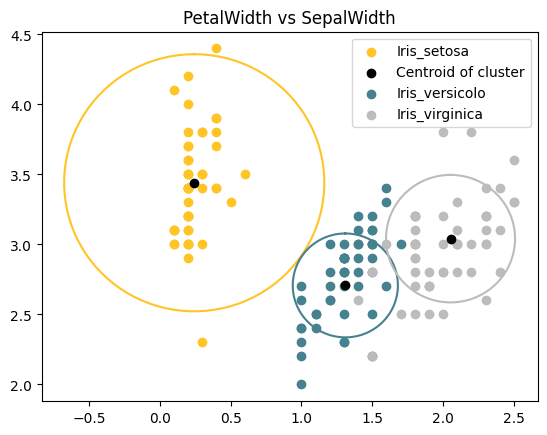

In [112]:
plt.scatter(Iris_setosa_PetalWidthCm, Iris_setosa_SepalWidthCm, c='#ffc425', label='Iris_setosa')
plt.scatter(history['centroids'][-3:][0][0] ,history['centroids'][-3:][0][1], c='black', label='Centroid of cluster')
circle(radius=history['radius'][0]-0.7, center=(history['centroids'][-3:][0][0] ,history['centroids'][-3:][0][1]), c='#ffc425')

plt.scatter(Iris_versicolor_PetalWidthCm, Iris_versicolor_SepalWidthCm, c='#45818e', label='Iris_versicolo')
plt.scatter(history['centroids'][-3:][1][0] ,history['centroids'][-3:][1][1], c='black')
circle(radius=history['radius'][1]-0.2, center=(history['centroids'][-3:][1][0] ,history['centroids'][-3:][1][1]), c='#45818e')

plt.scatter(Iris_virginica_PetalWidthCm, Iris_virginica_SepalWidthCm, c='#bcbcbc', label='Iris_virginica')
plt.scatter(history['centroids'][-3:][2][0] ,history['centroids'][-3:][2][1], c='black')
circle(radius=history['radius'][2]+0.2, center=(history['centroids'][-3:][2][0] ,history['centroids'][-3:][2][1]), c='#bcbcbc')

plt.title('PetalWidth vs SepalWidth')

plt.legend()

plt.show()

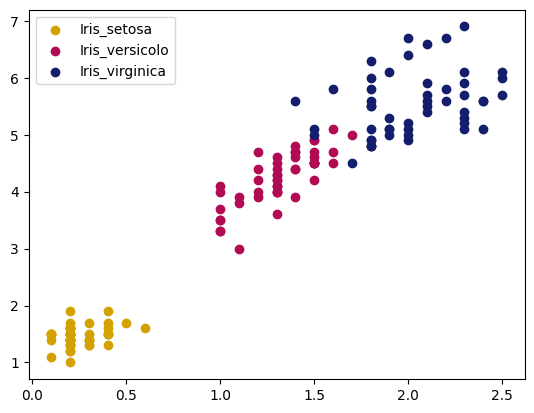

In [116]:
plt.scatter(Iris_setosa_PetalWidthCm, Iris_setosa_PetalLengthCm, c='#d3a200', label='Iris_setosa')
plt.scatter(Iris_versicolor_PetalWidthCm, Iris_versicolor_PetalLengthCm, c='#b10b53', label='Iris_versicolo')
plt.scatter(Iris_virginica_PetalWidthCm, Iris_virginica_PetalLengthCm, c='#141e6c', label='Iris_virginica')
plt.legend()

In [196]:
model = KMeanClustring(k=3)

epochs = 10
history = model.fit(
    x = df['PetalWidthCm'][: int((len(df['PetalWidthCm']))*0.8)],
    y = df['PetalLengthCm'][: int((len(df['PetalLengthCm']))*0.8)],
    epochs=epochs
)

epoch: 1 
New Centroids: [[0.5 6.3]
 [0.2 4.2]
 [1.6 1.9]]
epoch: 2 
New Centroids: [[2.07222222 5.76111111]
 [1.34901961 4.30196078]
 [0.26078431 1.49411765]]
epoch: 3 
New Centroids: [[2.06842105 5.72105263]
 [1.33137255 4.2627451 ]
 [0.244      1.464     ]]
epoch: 4 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]
epoch: 5 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]
epoch: 6 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]
epoch: 7 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]
epoch: 8 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]
epoch: 9 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]
epoch: 10 
New Centroids: [[2.05  5.685]
 [1.324 4.248]
 [0.244 1.464]]


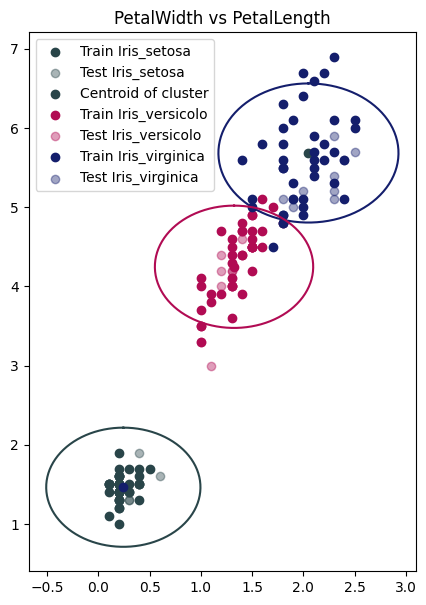

In [215]:
plt.figure(figsize=(5, 7))

plt.scatter(Iris_setosa_PetalWidthCm[:int(len(Iris_setosa_PetalWidthCm)*0.8)], Iris_setosa_PetalLengthCm[:int(len(Iris_setosa_PetalLengthCm)*0.8)], c='#294549', label='Train Iris_setosa')
plt.scatter(Iris_setosa_PetalWidthCm[int(len(Iris_setosa_PetalWidthCm)*0.8):], Iris_setosa_PetalLengthCm[int(len(Iris_setosa_PetalLengthCm)*0.8):], c='#294549', alpha=0.4, label='Test Iris_setosa')
plt.scatter(history['centroids'][-3:][0][0] ,history['centroids'][-3:][0][1], c='#294549', label='Centroid of cluster')
circle(radius=history['radius'][0], center=(history['centroids'][-3:][0][0], history['centroids'][-3:][0][1]), c='#141e6c')
plt.legend()

plt.scatter(Iris_versicolor_PetalWidthCm[:int(len(Iris_versicolor_PetalWidthCm)*0.8)], Iris_versicolor_PetalLengthCm[:int(len(Iris_versicolor_PetalLengthCm)*0.8)], c='#b10b53', label='Train Iris_versicolo')
plt.scatter(Iris_versicolor_PetalWidthCm[int(len(Iris_virginica_PetalWidthCm)*0.8):], Iris_versicolor_PetalLengthCm[int(len(Iris_versicolor_PetalLengthCm)*0.8):], c='#b10b53', alpha=0.4 , label='Test Iris_versicolo')
plt.scatter(history['centroids'][-3:][1][0] ,history['centroids'][-3:][1][1],  c='#b10b53')
circle(radius=history['radius'][1], center=(history['centroids'][-3:][1][0], history['centroids'][-3:][1][1]), c='#b10b53')
plt.legend()

plt.scatter(Iris_virginica_PetalWidthCm[:int(len(Iris_virginica_PetalWidthCm)*0.8)], Iris_virginica_PetalLengthCm[:int(len(Iris_virginica_PetalLengthCm)*0.8)], c='#141e6c', label='Train Iris_virginica')
plt.scatter(Iris_virginica_PetalWidthCm[int(len(Iris_virginica_PetalWidthCm)*0.8):], Iris_virginica_PetalLengthCm[int(len(Iris_virginica_PetalWidthCm)*0.8):], c='#141e6c', alpha=0.4, label='Test Iris_virginica')
plt.scatter(history['centroids'][-3:][2][0] ,history['centroids'][-3:][2][1],  c='#141e6c')
circle(radius=history['radius'][2]-3, center=(history['centroids'][-3:][2][0] ,history['centroids'][-3:][2][1]), c='#294549')
plt.legend()

plt.title('PetalWidth vs PetalLength')

plt.show()

# DBSCAN

DBSCAN requires only two parameters
* epsilon: it is the radius of the circle around the data point.
* minpoints: it is the min. number of data points requires in circle created above to classify as core point.

**NOTE**: in higher dimension the circle becomes sphere.

---

![datacluster](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db25.png)

![datacluster with circle](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db26.png)

---

* All the data points with at least 3 points in the circle including itself are considered as Core points.(red)
* All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points.(yellow)
* data points with no point other than itself present inside the circle are considered as Noise.(purple)

### #Reachablity:
it states that a data point can be accessed from another data directly or indirectly.

### #Connectivity:
it talks about whether the two data points are belongs to the sae cluster or not.



1. **Directly density reachable**:
if point x belongs from the circle of core point y then x and y are called directly density reachable.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db10.png)

2. **Density reachable**:
if a point x is reachable from point y by the chain of points p1, p2,...pn(core points) then x and y are called Density reachable.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db11.png)

3. **Density connected**:
if there exists a point o such that x and y are density reachable from o then x and y are called density connected.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db12.png)


**NOTE:** The value of min. point should be one greater then dimension of data. minPoints >= dimensions + 1

* The value of epsilon can be decided from the K-distance graph. The point of maximum curvature (elbow) in this graph tells us about the value of epsilon.
* If the value of epsilon chosen is too small then a higher number of clusters will be created, and more data points will be taken as noise.
* Whereas, if chosen too big then various small clusters will merge into a big cluster, and we will lose details.

### Algorithm

1. select an random data point and Find the calculate distance between data points from it.
2. sort the claculated distance in ascending order and plot the k-distance graph and find **Knee-point**

2. pick a random data point.
3. create a circle around it of radius=epsilon.

    a. find the points that falls under the circle(directly density reachable)

    if there are sufficient points inside the cluster:
      mark it as core data point
      
    else:
      mark it as noise
    
4. now repeat the steps 1 and 2 for data points that falls under the circle created in above steps.

knee point :- the point from where curve starts banding, this bend indicates that beyond this point the distance started increasing more rapidly, indicating natural selection point between points.

In [ ]:
import numpy as np
import sys

class DBSCAN():
  def __init__(self, minPoints):
    self.history = {}
    self.minPoints = minPoints
    self.cluster = []

  def calculate_euclidian_distance(self, x1, y1, x2, y2):
    return np.sqrt( ((x2-x1)**2) + ((y2-y1)**2) )

  def find_SeprationPoint(self, distance, random_point): #point from where the graph started increasing rapidly
    point = distance[random_point]
    max = -9999
    for index, value in enumerate(distance):
      if max < (point - value):
        max = point - value
        save_index = index
    return distance[save_index]

  def find_avgSeprationPoint(self, distance):
    sum = 0
    for dist in distance:
      sum += dist
    return sum/len(distance)

  def find_epsilon(self, x, y): #Finding_KneePoint
    len_x = len(x); len_y = len(y)
    if len_x != len_y:
      sys.exit('Error: dimension mismatch expected {}, recieved {}' .format((1, len_x), (1, len_y)))
    self.random_point = np.random.randint(0, len_x)
    rand_x = x[self.random_point] #x1
    rand_y = y[self.random_point] #y1
    distance = [self.calculate_euclidian_distance(rand_x, rand_y, x[i], y[i]) for i in range(len_x)]
    distance.sort()
    epsilon = self.find_avgSeprationPoint(distance)
    self.history['distance'] = distance
    return epsilon

  def find_corePoints(self, epsilon, x, y):
    core_points = []
    for index, value in enumerate(self.history['distance']):
      if (self.history['distance'][self.random_point] - value)**2 >= epsilon**2:
          core_points.append(index) #adding index of points not points itself
    return core_points

  def expand_cluster(self, epsilon, core_points, x, y):
    #search for core points
    temp = []
    for i, point in enumerate(core_points):
      if (point in self.cluster) != True:
        for index, value in enumerate(self.history['distance']):
          if (self.history['distance'][point] - value)**2 <= epsilon**2:
            temp.append(index)
        if len(temp) >= self.minPoints:
          self.cluster.append(point)
          self.expand_cluster(epsilon, temp, x, y)
    return temp

  def __call__(self, x, y):
    epsilon = self.find_epsilon(x, y)
    core_points = self.find_corePoints(epsilon, x, y)
    self.cluster.append(self.random_point)
    core_points = self.expand_cluster(epsilon, core_points, x, y)
    self.history['cluster'] = self.cluster
    return self.history

In [ ]:
history = DBSCAN(3)(x, y)

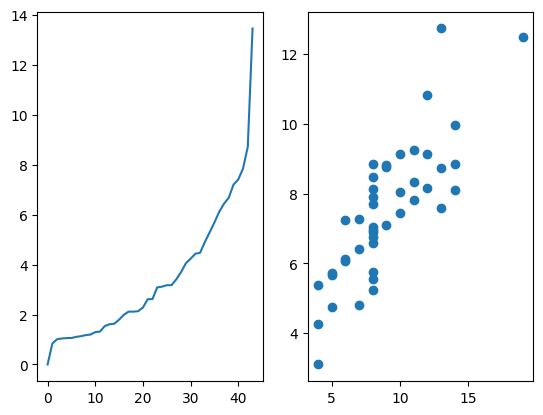

In [ ]:
distance = history['distance']

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range(len(distance)), distance)

plt.subplot(1, 2, 2)
cluster = history['cluster']
X = [[], []]
for index in cluster:
  X[0].append(x[index]); X[1].append(y[index])
x, y = X
plt.scatter(x, y)
plt.show()

In [ ]:
#confusion matrix
#Negative = -1
#positive = 1
#Flase = -2
#True = 2

from scipy.integrate import simps

class confusionMatrix:
  def __init__(self):
    self.matrix = [[0, 0],
                   [0, 0]]
    self.n_samples = 0
    self.true_positive = []
    self.false_positive = []

  def create(self, predicted, input):
    self.n_samples = len(input)
    for i in range(len(predicted)):
      if predicted[i] == 'Positive' and input[i] == 'Positive':
        self.matrix[0][0] = self.matrix[0][0] + 1
        self.true_positive.append(self.matrix[0][0])
      elif predicted[i] == 'Positive' and input[i] == 'Negative':
        self.matrix[0][1] = self.matrix[0][1] + 1
        self.false_positive.append(self.matrix[0][1])
      elif predicted[i] == 'Negative' and input[i] == 'Positive':
        self.matrix[1][0] = self.matrix[1][0] + 1
      elif predicted[i] == 'Negative' and input[i] == 'Negative':
        self.matrix[1][1] = self.matrix[1][1] + 1

  def accuracy(self):
    #Accuracy = (True Positives + True Negatives) / Total Samples
    return (self.matrix[0][0] + self.matrix[1][1]) / self.n_samples

  def precision(self):
    #tells how many sample predicted positive out of all correctly predicted image

    #Precision = True Positives / (True Positives + False Positives)
    return (self.matrix[0][0]) / (self.matrix[0][0] + self.matrix[0][1])

  def sensitivity(self):
    #Recall = True Positives / (True Positives + False Negatives)
    return (self.matrix[0][0]) / (self.matrix[0][0] + self.matrix[1][0])

  def f1_score(self):
    return (2 * self.precision() * self.sensitivity()) /  (self.precision() + self.sensitivity())

  def Specificity(self): #(True Negative Rate
    #Specificity = True Negatives / (True Negatives + False Positives)
    return self.matrix[1][1] / (self.matrix[1][1] + self.matrix[0][1])

  def FPR(self): #false positive rate
    #FPR = False Positives / (False Positives + True Negatives)
    return self.matrix[0][1] / (self.matrix[0][1] + self.matrix[1][1])

  def FNR(self): #false Negative rate
    #FNR = False Negatives / (False Negatives + True Positives)
    return self.matrix[1][0] / (self.matrix[1][0] + self.matrix[0][0])

  def viz_confusionMatrix(self):
    plt.imshow(self.matrix, cmap='YlOrRd')
    for i in range(2):
      for j in range(2):
        plt.text(i, j, self.matrix[i][j])
    plt.ylabel('Predicted'); plt.xlabel('Actual'); plt.title('Confusion Matrix'); plt.grid(False)
    plt.xticks([0, 1], labels=['Postive', 'Negative']); plt.yticks([0, 1], labels=['Postive', 'Negative'])
    plt.show();

  def ROC_curve(self): #Receiver Operating Characteristic (ROC) Curve
    #Plot the true positive rate against the false positive rate to understand the trade-off between sensitivity and specificity.
    plt.style.use('seaborn-whitegrid')
    plt.plot(range(len(self.true_positive)), self.true_positive, label='True Positive')
    plt.plot(range(len(self.false_positive)), self.false_positive, label='False Positive')
    plt.legend(); plt.show();

  def AUC_ROC(self): #Area Under the ROC Curve
    min = len(self.true_positive)
    if len(self.false_positive) < min:
      min = len(self.false_positive)
    return simps(self.true_positive[:min], self.false_positive[:min])

In [ ]:
import random

predicted = random.choices(['Positive', 'Negative'], weights=[0.5, 0.5], k=100)
actual = random.choices(['Positive', 'Negative'], weights=[0.5, 0.5], k=100)

print(predicted, '\n', actual)

['Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Po

In [ ]:
model = confusionMatrix()
model.create(predicted, actual)

In [ ]:
print('model accuracy:', model.accuracy())
print('model precision:', model.precision())
print('model sensitivity:', model.sensitivity())
print('model f1_score:', model.f1_score())
print('model Specificity:', model.Specificity())
print('model FPR:', model.FPR())
print('model FNR:', model.FNR())
print('model AUC-ROC:', model.AUC_ROC())

model accuracy: 0.51
model precision: 0.54
model sensitivity: 0.5094339622641509
model f1_score: 0.5242718446601942
model Specificity: 0.5106382978723404
model FPR: 0.48936170212765956
model FNR: 0.49056603773584906
model AUC-ROC: 264.0


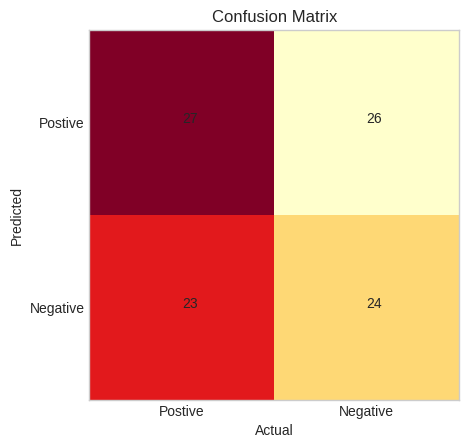

In [ ]:
model.viz_confusionMatrix()

<ipython-input-301-b1830942e941>:71: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


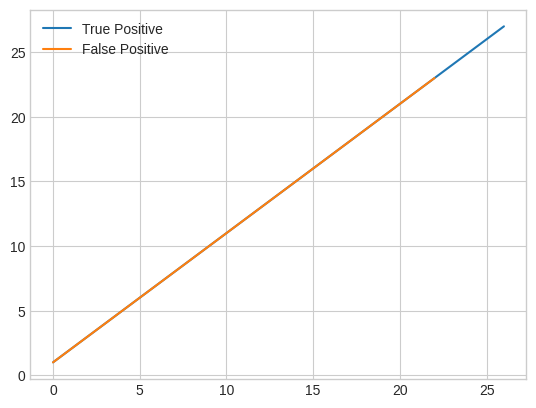

In [ ]:
model.ROC_curve()

# Data Mining & predicting modeling

## Aim:- Preproceeing diabatic dataset

**Code:-**

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mathchi/diabetes-data-set
!unzip diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 17.1MB/s]
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = df.sort_values(by=['Age'])

In [ ]:
Age = df['Age']
Glucose = df['Glucose']
Insulin = df['Insulin']
BMI = df['BMI']
BloodPressure = df['BloodPressure']
Outcome = df['Outcome']
SkinThickness	 = df['SkinThickness']

In [ ]:
def normal(series, **kwargs):
  series = np.array(series)
  series = np.squeeze(series)
  mean = series.mean()
  std = series.std()
  for key, value in kwargs.items():
    if key == 'mean':
      mean = value
    if key == 'std':
      std = value
  f = 1 / (std * np.sqrt(2*np.pi))
  z = -1/2 * np.power((series - mean)/ std , 2)
  y = f * np.exp(z)
  return y

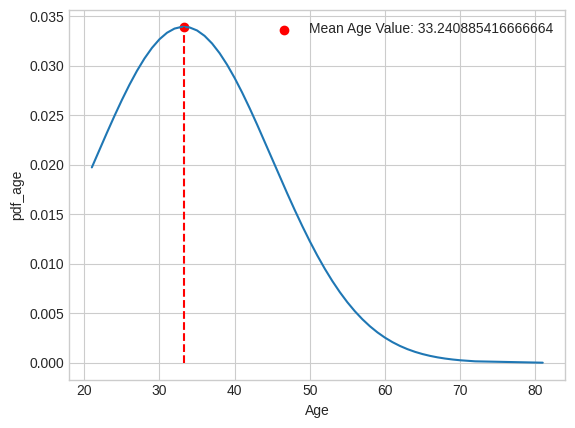

In [ ]:
import matplotlib.pyplot as plt

y = normal(Age)
plt.plot(Age, y)
plt.scatter(Age.mean(), max(y), color='red', label=f'Mean Age Value: {Age.mean()}')
plt.plot([Age.mean() for _ in range(10)], np.linspace(0, max(y), 10), '--r')
plt.legend()
plt.xlabel('Age')
plt.ylabel('pdf_age')
plt.grid(True)
plt.show()

In [ ]:
Glucose_normal = df[df['Glucose'] < 140 ]
Glaucose_prediabetes = df[df['Glucose'] > 140 ]
Glaucose_prediabetes = Glaucose_prediabetes[ Glaucose_prediabetes['Glucose'] < 199 ]
Glucose_excess = df[df['Glucose'] > 200]

In [ ]:
Glucose_normal = Glucose_normal.groupby(['Outcome']).count()
Glaucose_prediabetes = Glaucose_prediabetes.groupby(['Outcome']).count()
Glucose_excess = Glucose_excess.groupby(['Outcome']).count()

[]

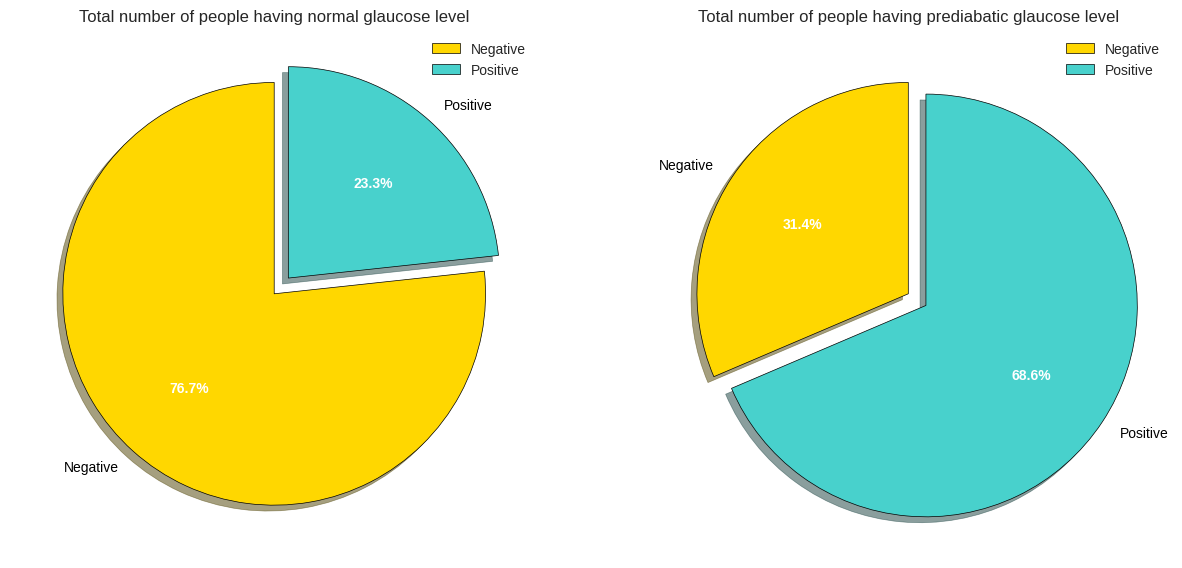

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
_, _, x = plt.pie(Glucose_normal['Age'], labels=['Negative', 'Positive'], shadow=True, explode=[0.0, 0.1], startangle=90, textprops={'color': 'black'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, autopct='%.1f%%', colors=['gold', 'mediumturquoise'])
plt.setp(x, color='white', fontweight='bold')
plt.title('Total number of people having normal glaucose level')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
_, _, x = plt.pie(Glaucose_prediabetes['Age'], labels=['Negative', 'Positive'], shadow=True, explode=[0.0, 0.1], startangle=90, textprops={'color': 'black'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, autopct='%.1f%%', colors=['gold', 'mediumturquoise'])
plt.setp(x, color='white', fontweight='bold')
plt.title('Total number of people having prediabatic glaucose level')
plt.legend(loc='upper right')

plt.plot()

In [ ]:
# Corelation in-between

def corelation(x, y):
  x , y = np.array(x), np.array(y)
  x, y = np.squeeze(x), np.squeeze(y)
  if x.shape != y.shape:
    sys.exit('Error: dimension mismatch got {} {}' .format(x.dim, y.dim))
  xmean = x.mean()
  ymean = y.mean()
  nmtr = 0; dmtr1 = 0; dmtr2 = 0
  for i in range(len(x)):
    nmtr += (x[i]  - xmean)*(y[i] - ymean)
    dmtr1 += (x[i] - xmean)**2; dmtr2 += (y[i] - ymean)**2

  return nmtr / np.sqrt(dmtr1 * dmtr2)

In [ ]:
r = [[] for _ in range(len(df.columns))]

for i in range(len(df.columns)):
  for j in range(len(df.columns)):
    r[i].append( corelation( df.iloc[:, i], df.iloc[:, j]) )

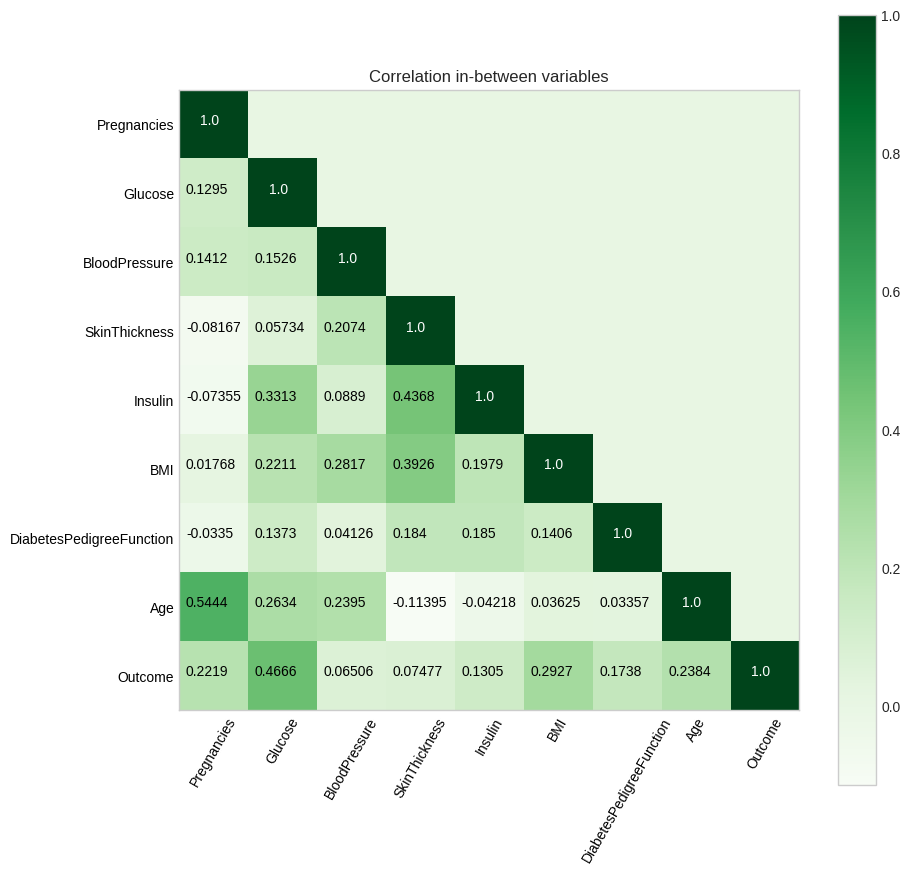

In [ ]:
r = np.array(r, dtype=np.float16)
r = np.tril(r)
plt.figure(figsize=(10, 10))
plt.imshow(r, cmap='Greens')
plt.colorbar()
plt.xticks([i for i in range(len(df.columns))], labels = df.columns, color='black', rotation=60)
plt.yticks([i for i in range(len(df.columns))], labels = df.columns, color='black')
plt.grid(False)
plt.title('Correlation in-between variables')
for i in range(len(df.columns)):
  for j in range(len(df.columns)):
    val = r[j][i]
    if val != 0.0:
      color = 'black'
      shift = 0.4
      if val == 1.0:
        color = 'white'
        shift = 0.2
      plt.text(i-shift, j, val, color=color)
plt.show()

## Aim:- Demonstration of classification rule process on dataset using simple K-means algorithm in weka explorer

**Procedure:-**

Load Dataset: Open the Weka Explorer and load your dataset. Go to the "Preprocess" tab, and click the "Open file" button to load your dataset.

Filter Data: If necessary, you can apply filters to preprocess your data. Click on the "Filter" button and select any filters you'd like to apply, such as removing attributes, filling missing values, or standardizing the data.

1. Choose K-Means: In the "Cluster" panel on the "Cluster" tab, select the "SimpleKMeans" algorithm.

2. Set Options: Click on the "SimpleKMeans" to open the options dialog. Set the following options:

3. numClusters: Set the number of clusters you want, which should correspond to the number of classes you want to create.
4. distanceFunction: Choose the distance function you want to use (e.g., Euclidean).
5. maxIterations: Set the maximum number of iterations the algorithm should run.
6. Run K-Means: Click the "Start" button to run the k-means algorithm on your data.

7. Inspect Results: After the algorithm finishes, switch to the "Cluster assignments" tab. Here you'll see the cluster assignments for each instance. You can treat each cluster as a class label.

8. Evaluate Results: To evaluate the performance of your classification, you can use the "Classify" tab. Load the same dataset and then load the cluster assignments you obtained from the k-means algorithm. You can now compare the predicted cluster assignments with the original class labels.


## Aim:- Build Neural network to preprocss diabatic dataset.

**Theory:-**

Neural networks are a class of machine learning models inspired by the structure and functioning of the human brain's interconnected neurons. They are used for a wide range of tasks, including classification, regression, image and speech recognition, and more.

**Code:-**

In [ ]:
import tensorflow as tf

In [ ]:
df1 = df.sort_values(by='Glucose')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
342,1,0,68,35,0,32.0,0.389,22,0
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
Age = (df1['Age'])
Outcome	 = (df1['Outcome'])

In [ ]:
train_x = Age[: int(len(Age)*0.8)]
train_y = Outcome[: int(len(Outcome)*0.8)]

val_x = Age[: int(len(Age)*0.8) ]
val_y = Outcome[: int(len(Outcome)*0.8) ]

In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)

#train_x = train_x.reshape(1, len(train_x))
#train_y = train_y.reshape(1, len(train_y))

In [ ]:
input = tf.keras.layers.Input(shape=(1,)) #takes input shape of individual samples not entire dataset
print(input)

x = tf.keras.layers.Dense(10, activation='sigmoid')(input)
print(x)

x = tf.keras.layers.Dense(5, activation='sigmoid')(x)
print(x)

out = tf.keras.layers.Dense(1, activation='sigmoid')(x)
print(out)

model = tf.keras.Model(inputs=input, outputs=out)
model.summary()

In [ ]:
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = ['mse', 'mae']
)

In [ ]:
epochs = 300

history = model.fit(
    train_x, train_y,
    epochs = epochs,
    validation_data=(val_x, val_y),
)

In [ ]:
index = 50

test = train_x[index]
prediciton = model.predict(np.expand_dims(test, axis=0))

print('Input: {} - Prediction: {} - Real: {}' .format(test, prediciton, df['Outcome'][index]))

1/1 [==============================] - 0s 36ms/step
Input: 22 - Prediction: [[0.12715179]] - Real: 0


#Aim:- Demonstration of association rule using dataset diabetic diagnosis using apriori algorithm in weka explorer.

Procedure:-
1. Load Dataset: Open the Weka Explorer and load your diabetic diagnosis dataset. Go to the "Preprocess" tab, and click the "Open file" button to load your dataset.

2. Filter Data: If needed, apply filters to preprocess your data. For association rule mining, you typically work with nominal (categorical) data. Make sure your dataset's attributes are properly configured as nominal.

3. Choose Apriori Algorithm: In the "Associate" panel on the "Associate" tab, select the "Apriori" algorithm.

4. Set Options: Click on the "Apriori" to open the options dialog. Set the following options:

5. minSupport: Set the minimum support threshold. This value determines how frequent an itemset must be in the dataset to be considered.

6. minConfidence: Set the minimum confidence threshold. This value determines the minimum level of confidence required for generated association rules.

7. numRules: Set the maximum number of rules to generate.
Run Apriori: Click the "Start" button to run the Apriori algorithm on your data.

8. Inspect Results: After the algorithm finishes, switch to the "Association rules" tab. Here you'll see the generated association rules along with support and confidence values.

9. Evaluate Results: Evaluate the generated rules based on your domain knowledge and objectives. You can filter rules based on support and confidence thresholds to focus on the most interesting rules.

10. Interpretation: Each association rule consists of an antecedent (left-hand side) and a consequent (right-hand side). The antecedent represents a set of items or conditions, and the consequent represents the result or prediction. For example, a rule like "Diagnosis=A -> Medication=B" indicates that if diagnosis A is present, medication B is likely to be prescribed.

11. Export or Use Rules: You can export the generated association rules to a file or use them for decision-making and insights. Weka provides options for exporting rules in various formats.

# SC

## Aim:- Create a perceptron with an appropriate number of inputs and outputs. Train it using a fixed incrementlearning algorithm until no change in weights is required. Output the final weights

**Theory:-**
* It is a first model of ANN with supervised learning.
* It is used for clasification of patterns that are linearly seprable.
* It consist of single neuron(input and output layer only) with adjustable synaptic weight and bias.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/general-diagram-of-perceptron-for-supervised-learning_4.jpg" alt="Perceptron" style="left-margin:50px;">

---

* as we know perceptron is built on single neuron so it is limited to perform classification with only two classes.
* By expanding the output layer to include more than one neurons, classification with more than two classes can be done(classes have to be linearly seprable).

<img src="https://upload.wikimedia.org/wikipedia/commons/a/af/Linearly_separable_red-blue_cropped_.svg" alt="linearly-seprable-data" class="inearly-seprable-data" margin="10%">
<label for="inearly-seprable-data">Linearly seprable Data</label>

<br><br>

**General Formula: $\sum_{n=1}^{n=m} _WiXi_ + _b_**

* adding bias makes the classification correct, without bias the hyperplane will always go through the origin.
* Every neural netwrok including percetron classify the data according to activation function.

    | +1 if  y > 0
    | 0  if  y = 0
    | -1 if  y < 0


**Code:-**

In [236]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = np.dot(x, self.weights)
        return self.activate(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights += self.learning_rate * (label - prediction) * np.insert(inputs, 0, 1)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for inputs in test_data:
    prediction = perceptron.predict(inputs)
    print(f"Inputs: {inputs} -> Prediction: {prediction}")

Inputs: [0 0] -> Prediction: 0
Inputs: [0 1] -> Prediction: 0
Inputs: [1 0] -> Prediction: 0
Inputs: [1 1] -> Prediction: 1


## Aim:- Training a feed forward Neural network.

**Theory:-**
* this neuron has only one input and one output and no hidden layer.
* the neuron is capable only to forward the signal.

      SOP = XW

* sigmoid function is use as a activation function.
      sigmoid = 1 / 1 + e^(-SOP)
      
* We are assuming the output will lie between 0 to 1. if there is two classes(c1 and c2) then class c1 if output is less then equal to 0.5 otherwise class c2.

* After calculating the predicted output we will measure the prediction error.
      error = $\sum_{n=0}to{n=N} (predicted - real)^2
      
* after calculation of prediction error, the forward pass is complete.

 Forward Pass:
* let initialy W = 0.5 and X = 2, y = 1 then SOP = 1.0 and
* sigmoid = 1 / 1 + e^(-1.0) => 0.73105857863
* output is 0.7
* error = (0.7 - 1.0)^2 = 0.09

In [238]:
import numpy as np

def sigmoid(sop):
      return 1.0 / (1 + np.exp(-1 * sop))

def error(predicted, real):
      return np.power(predicted - real, 2)

x = 2
real = 1.0
learning_rate = 0.01
w = np.random.rand()

print("initial w: ", w)

for i in range(int(input('Enter epoches: '))):
      # Forward pass
      y = w * x
      predicted = sigmoid(y)
      err = error(predicted, real)
      print("Prediction: %f, Error: %f, weight: %f" %(predicted, err, w))

initial w:  0.3135347834339869
Enter epoches: 1
Prediction: 0.651825, Error: 0.121226, weight: 0.313535


## Aim:- Train Feed Forward neural Network with Back propagation

**Theory:-**

Backaward pass:
* in backward pass we will try to adjust the value of weight to minimize the error.
* To minimize the error we will do differentitaion of error w.r.t to W{d(error)/dW} and set it to equal to zero.
          weight gradient => dError/dW = dError/dPredicted * dPredicted/dSOP * dSOP/dW
          dError/dPredected = 2(predicted - real) = 2(0.7 - 1.0) = -0.6
          dPredected/dSOP = (1 / 1 + e^-SOP) * (1 - (1 / 1 + e^-SOP)) = (0.534) * (0.36) = 0.196
          dSOP/dW = X = 2
          dError/dW = -0.6 * 0.196 * 2 = -0.2352

* weight adjustment formula is W(new) = W(old) - learning_rate * grad
      W(new) = 0.5 - 0.01 * (-0.2352) = 0.502352
      
* the new weight is grater then older one, we will repeat this step and adjust the value of weight until we find the apropriate weight.

In [241]:
import numpy as np

def sigmoid(sop):
      return 1.0 / (1 + np.exp(-1 * sop))

def error(predicted, real):
      return np.power(predicted - real, 2)

def error_prediction_deriv(predicted, real):
      return 2 * (predicted - real)

def prediction_sop_derv(sop):
      return sigmoid(sop) * (1.0 - sigmoid(sop))

def sop_w_deriv(x):
      return x;

def update_w(w, grad, learning_rate):
      return w - (learning_rate * grad)

x = 2
real = 1.0
learning_rate = 14
w = np.random.rand()

print("initial w: ", w)

for i in range(int(input('Enter epoches: '))):
      # Forward pass
      y = w * x
      predicted = sigmoid(y)
      err = error(predicted, real)
      print("Prediction: %f, Error: %f, real: %f, weight: %f" %(predicted, err, real, w))

      #Backward pass
      g1 = error_prediction_deriv(predicted, real)
      g2 = prediction_sop_derv(y)
      g3 = sop_w_deriv(x)

      grad = g1 * g2 *g3

      w  = update_w(w, grad, learning_rate)

initial w:  0.432413497094559
Enter epoches: 5
Prediction: 0.703668, Error: 0.087813, real: 1.000000, weight: 0.432413
Prediction: 0.999584, Error: 0.000000, real: 1.000000, weight: 3.892704
Prediction: 0.999584, Error: 0.000000, real: 1.000000, weight: 3.892714
Prediction: 0.999584, Error: 0.000000, real: 1.000000, weight: 3.892723
Prediction: 0.999584, Error: 0.000000, real: 1.000000, weight: 3.892733


## Aim:- Building a Linear Regression Neural network


## Aim:- Implementation of Self-Organizing Map.

**Theory:-**

A Self-Organizing Map (SOM), also known as a Kohonen map or Kohonen network, is an unsupervised machine learning algorithm used for clustering and visualizing high-dimensional data. It's a type of artificial neural network that can create a low-dimensional representation of input data while preserving its topological properties.

SOMs are particularly useful for dimensionality reduction and visualization tasks, as they can reveal underlying patterns and relationships in the data. They achieve this by mapping high-dimensional input data onto a lower-dimensional grid of neurons. Each neuron is associated with a weight vector that adjusts to become similar to the input data it's presented with.

overview of how SOMs work:

1. Initialization: Initialize a grid of neurons (nodes) in a lower-dimensional space. Each neuron's weight vector has the same dimension as the input data.

2. Data Presentation: For each input data point, find the neuron with the closest weight vector (usually determined by Euclidean distance). This neuron is called the "Best Matching Unit" (BMU).

3. Update Weights: Adjust the weights of the BMU and its neighboring neurons. The goal is to make the BMU's weight vector more similar to the input data. Neighboring neurons are also updated, but with decreasing intensity as they move away from the BMU.

4. Learning Rate and Neighborhood Radius: As training progresses, the learning rate and the radius of the neighborhood influence the extent of weight updates. Typically, these values decrease over time, allowing the SOM to converge gradually.

5. Iteration: Repeat steps 2-4 for a number of training iterations or until convergence. The result is a grid of neurons where similar data points are mapped close to each other.


In [252]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

data_file = "data_banknote_authentication.txt"
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0,4) ,dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,),dtype=np.int64)

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(1097, 4) (1097,) (275, 4) (275,)


**Code:-**

In [253]:
# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance:
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [254]:
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

In [ ]:
train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

In [256]:
label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t])

sample data:  1000


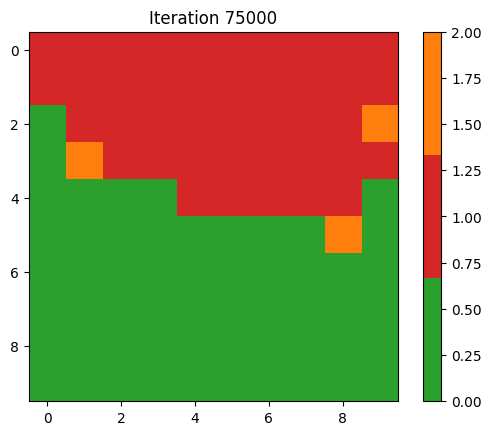

In [258]:
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()